# Explicando ANN (Clasificación) para identificar depresión por fuerza bruta

## Preparación de los datos

Lectura de los datos de acuerdo a sus datasets

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Dataset_MO_ENG.csv")
dq = pd.read_csv("Dataset_QS_STATUS.csv")
dm = pd.read_csv("Dataset_QS_METRICS.csv")

Eliminación de las preguntas fisicas-relativas

In [2]:
df = df.drop(df.columns[102:-1], axis=1)

Determinación de la pregunta continua por fuerza bruta

In [3]:
numberQuestion = dq.iloc[:, 0]
statusQuestion = dq.iloc[:, 1]

numberSelect = None

index = -1
for status in statusQuestion:
    index += 1
    if status == 'None':
        numberSelect = numberQuestion[index]
        break
        
if numberSelect == None:
    exit()
    
numberSelect

1

Eliminación de la pregunta continua

In [4]:
df.drop(df.columns[numberSelect - 1],axis=1, inplace=True)
df

,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,1,0,1,0,1,1,1,0,0,1,...,1,1,0,0,1,0,1,0,1,2
1,0,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,2
2,0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,3
3,0,0,1,0,1,1,1,1,0,0,...,0,1,0,1,1,0,1,0,1,5
4,1,0,1,0,1,0,1,1,1,1,...,0,1,0,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,0,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,5
100,1,0,0,1,1,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,3
101,0,1,1,1,1,1,0,1,1,0,...,0,1,0,0,1,1,1,1,1,2
102,0,0,0,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,0,4


Agrupación de los targets en las nuevas clases Low, Medium y High

In [5]:
dic = { 1: 0 , 2: 0, 3:1, 4:2, 5:2} 
df['Target'] = df['Target'].map(dic)

train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]
target_names=["Low","Medium","High"]
df

,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,1,0,1,0,1,1,1,0,0,1,...,1,1,0,0,1,0,1,0,1,0
1,0,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
2,0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
3,0,0,1,0,1,1,1,1,0,0,...,0,1,0,1,1,0,1,0,1,2
4,1,0,1,0,1,0,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,0,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,2
100,1,0,0,1,1,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,1
101,0,1,1,1,1,1,0,1,1,0,...,0,1,0,0,1,1,1,1,1,0
102,0,0,0,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,0,2


## Equilibración de los datos

Verificación del equilibrio de los datos

In [6]:
import numpy as np
from imblearn.over_sampling import SMOTE

y.value_counts()

0    39
1    35
2    30
Name: Target, dtype: int64

Uso del oversampling con SMOTE

In [7]:
random_state = 13
oversample = SMOTE(random_state=random_state)
X, y = oversample.fit_resample(X, y)

y.value_counts()

0    39
1    39
2    39
Name: Target, dtype: int64

## Preparación del entrenamiento de la red neuronal

Asignación de los datos de entrenamiento

In [8]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

## Entrenamiento de la red neuronal

Entrenamiento por medio de diferentes conbinaciones por medio de la validación cruzada con alpha regular

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

regul_param_range = 10.0 ** -np.arange(-2, 7)

for regul_param in regul_param_range:
    mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=regul_param, 
             learning_rate='constant', learning_rate_init=0.0001, max_iter=100000, random_state=seed)

    scores = cross_val_score(mlp, X, y, cv=5, scoring='f1_macro')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([0.1632974910394265,
  0.2834597501264168,
  0.44443174300759436,
  0.465916055621938,
  0.474239046700347,
  0.474239046700347,
  0.474239046700347,
  0.474239046700347,
  0.474239046700347],
 [0.006619092595549127,
  0.10985019898157435,
  0.06698089923542092,
  0.07054571807864288,
  0.05408362150214436,
  0.05408362150214436,
  0.05408362150214436,
  0.05408362150214436,
  0.05408362150214436])

Generación de la grafica de curva de aprendizaje con alpha regular

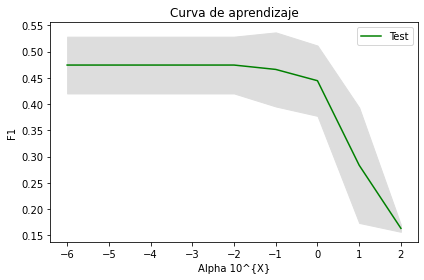

In [10]:
import matplotlib.pyplot as plt

plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

plt.title("Curva de aprendizaje")
plt.xlabel("Alpha 10^{X}"), plt.ylabel("F1"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Entrenamiento por medio de diferentes conbinaciones por medio de la validación cruzada con alpha en 1

In [11]:
cv_scores_mean=[]
cv_scores_std=[]

regul_param_range = 10.0 ** -np.arange(0, 7)

for regul_param in regul_param_range:
    mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=1, 
             learning_rate='constant', learning_rate_init=regul_param, max_iter=100000, random_state=seed)
    
    scores = cross_val_score(mlp, X, y, cv=5, scoring='f1_macro')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([0.16329749103942653,
  0.43403714563157286,
  0.4572648060573757,
  0.4584562393231124,
  0.44443174300759436,
  0.16659498207885304,
  0.16659498207885304],
 [0.006619092595549127,
  0.0955159795428722,
  0.07273787853127925,
  0.08161975231242144,
  0.06698089923542092,
  0.006020651927912844,
  0.006020651927912844])

Generación de la grafica de curva de aprendizaje con alpha regular

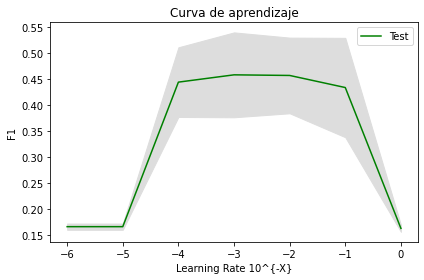

In [12]:
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

plt.title("Curva de aprendizaje")
plt.xlabel("Learning Rate 10^{-X}"), plt.ylabel("F1"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Generación del modelo final de la red neuronal

Se genera el modelo final de la red neuronal a partir de los datos anteriormente entrenados

In [13]:
mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=1, 
             learning_rate='constant', learning_rate_init=0.0001, max_iter=100000, random_state=77)

mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(10,),
              learning_rate_init=0.0001, max_iter=100000, random_state=77)

Se guarda el modelo final de la red neuronal

In [14]:
import joblib

joblib.dump(mlp,"modelo_depresion.pkl")

['modelo_depresion.pkl']

## Preparación de los datos para la explicación de la red neuronal

Lectura de los datos de acuerdo a sus datasets

In [15]:
df = pd.read_csv("Dataset_MO_ENG.csv")
dq = pd.read_csv("Dataset_QS_STATUS.csv")

Eliminación de las preguntas fisicas-relativas

In [16]:
df = df.drop(df.columns[102:-1], axis=1)

Determinación de la pregunta continua por fuerza bruta

In [17]:
numberQuestion = dq.iloc[:, 0]
statusQuestion = dq.iloc[:, 1]

numberSelect = None

index = -1
for status in statusQuestion:
    index += 1
    if status == 'None':
        numberSelect = numberQuestion[index]
        break
        
if index == -1:
    exit()
    
numberSelect

1

Eliminación de la pregunta continua

In [18]:
df.drop(df.columns[numberSelect - 1],axis=1, inplace=True)
df

,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,1,0,1,0,1,1,1,0,0,1,...,1,1,0,0,1,0,1,0,1,2
1,0,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,2
2,0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,3
3,0,0,1,0,1,1,1,1,0,0,...,0,1,0,1,1,0,1,0,1,5
4,1,0,1,0,1,0,1,1,1,1,...,0,1,0,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,0,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,5
100,1,0,0,1,1,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,3
101,0,1,1,1,1,1,0,1,1,0,...,0,1,0,0,1,1,1,1,1,2
102,0,0,0,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,0,4


Agrupación de los targets en las nuevas clases Low, Medium y High

In [19]:
dic = { 1: 0 , 2: 0, 3:1, 4:2, 5:2} 
df['Target'] = df['Target'].map(dic)

train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]
target_names=["Low","Medium","High"]
df

,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,1,0,1,0,1,1,1,0,0,1,...,1,1,0,0,1,0,1,0,1,0
1,0,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
2,0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
3,0,0,1,0,1,1,1,1,0,0,...,0,1,0,1,1,0,1,0,1,2
4,1,0,1,0,1,0,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,0,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,2
100,1,0,0,1,1,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,1
101,0,1,1,1,1,1,0,1,1,0,...,0,1,0,0,1,1,1,1,1,0
102,0,0,0,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,0,2


Equilibrio de los datos anteriormente leidos

In [20]:
y.value_counts()

0    39
1    35
2    30
Name: Target, dtype: int64

Uso del oversampling con SMOTE

In [21]:
random_state = 13
oversample = SMOTE(random_state=random_state)
X, y = oversample.fit_resample(X, y)

y.value_counts()

0    39
1    39
2    39
Name: Target, dtype: int64

Lectura del modelo final de la red neuronal

In [22]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
mlp= joblib.load("modelo_depresion.pkl")

# Preparación de la explicabilidad del red neuronal

Uso del counterfactuals para la explicabilidad

In [23]:
import dice_ml

d = dice_ml.Data(dataframe=df, continuous_features=[], outcome_name='Target')

mlp = joblib.load("modelo_depresion.pkl")
m = dice_ml.Model(model=mlp, backend="sklearn")

exp = dice_ml.Dice(d, m, method="random")

e1 = exp.generate_counterfactuals(query_instances=X_test[0:2], total_CFs=2, desired_class=2)
e1.visualize_as_dataframe(show_only_changes=True)

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.05s/it]C:\Program Files\Python310\lib\site-packages\dice_ml\explainer_interfaces\dice_random.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cfs_df = cfs_df.append(rows_to_add)
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]

Query instance (original outcome : 0)


,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0



Diverse Counterfactual set (new outcome: 2)


,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,-,-,0,-,0,-,0,-,-,-,...,-,-,-,1,-,-,-,-,0,2
1,-,-,-,-,-,-,-,-,-,-,...,-,1,1,1,-,-,-,-,0,2


Query instance (original outcome : 1)


,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,0,0,0,0,1,1,1,0,1,1,...,0,1,1,0,1,0,1,0,1,1



Diverse Counterfactual set (new outcome: 2)


,2. I don't feel like doing my daily duties,3. My friends or family have told me that I look different,4. When I think about the future it is difficult for me to imagine it clearly,5. People around me often ask me how I feel,6. I consider that my life is full of good things,7. My hobbies are still important to me,8. I'm still as punctual as I have always been,"9. If I had the chance, I would spend all day in my bed",10. I have found that I can spend a lot of time scrolling the screen \nof my cell phone without searching or stopping at anything in particular,"11. When someone asks me something, I have noticed that I take longer than normal to\nrespond",...,94. I lose control easily,95. Neighbors must put up with each other's noises without complaining,96. Littering on public roads is wrong,97. People who commit crimes have their reasons for doing it,98. It is normal to change jobs several times a year,99. It is important to respect turns,100. I could pretend to be someone else to achieve what I want,101. I consider it important that all people have the same rights,"102. I have a hard time taking ""no"" for an answer",Target
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2


# Explicación de la red neuronal

Explicación del modelo por medio de la matrix de confusión

C:\Users\manue\AppData\Local\Temp\ipykernel_11140\1714730595.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_test.columns = X.columns.str.replace(r".", "")
C:\Program Files\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 10 I have found that I can spend a lot of time scrolling the screen 
of my cell phone without searching or stopping at anything in particular
- 100 I could pretend to be someone else to achieve what I want
- 101 I consider it important that all people have the same rights
- 102 I have a hard time taking  "no" for an answer
- 11 When someone asks me something, I have noticed that I take longer than normal to
respond
- ...
Feature names seen at fit

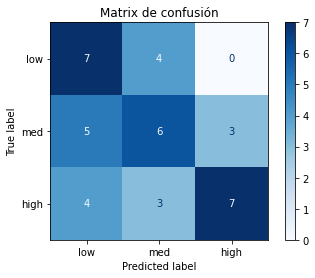

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

X_test.columns = X.columns.str.replace(r".", "")

matrixConfision = ConfusionMatrixDisplay.from_estimator (mlp, X_test, y_test, display_labels=['low','med','high'], cmap=plt.cm.Blues)
matrixConfision.ax_.set_title('Matrix de confusión')

plt.show()

Obtención de los valores de importancia a partir la matrix de confisión

In [25]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = mlp.predict(X_test)

print('Matrix de confusión:')
print(confusion_matrix(y_test,y_pred))
print()
print('Classification accuracy =',accuracy_score(y_test,y_pred)*100,'%\n')
print(classification_report(y_test,y_pred))

Matrix de confusión:
[[7 4 0]
 [5 6 3]
 [4 3 7]]

Classification accuracy = 51.28205128205128 %

              precision    recall  f1-score   support

           0       0.44      0.64      0.52        11
           1       0.46      0.43      0.44        14
           2       0.70      0.50      0.58        14

    accuracy                           0.51        39
   macro avg       0.53      0.52      0.52        39
weighted avg       0.54      0.51      0.52        39



C:\Program Files\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 10 I have found that I can spend a lot of time scrolling the screen 
of my cell phone without searching or stopping at anything in particular
- 100 I could pretend to be someone else to achieve what I want
- 101 I consider it important that all people have the same rights
- 102 I have a hard time taking  "no" for an answer
- 11 When someone asks me something, I have noticed that I take longer than normal to
respond
- ...
Feature names seen at fit time, yet now missing:
- 10. I have found that I can spend a lot of time scrolling the screen 
of my cell phone without searching or stopping at anything in particular
- 100. I could pretend to be someone else to achieve what I want
- 101. I consider it important that all people have the same rights
- 102. I have a ha

# Almacenamiento de los datos

Se recuperan los valores de importancia y se almacenan para escritura

In [26]:
from sklearn import metrics
clf_rep = metrics.precision_recall_fscore_support(y_test,y_pred)
clf_rep

(array([0.4375    , 0.46153846, 0.7       ]),
 array([0.63636364, 0.42857143, 0.5       ]),
 array([0.51851852, 0.44444444, 0.58333333]),
 array([11, 14, 14], dtype=int64))

Se prepara los datos recuperados para su escritura

In [27]:
clf_rep
accuracy = accuracy_score(y_test,y_pred)*100
precision = [clf_rep[0][0], clf_rep[0][1], clf_rep[0][2]]
recall = [clf_rep[1][0], clf_rep[1][1], clf_rep[1][2]]
f1_score = [clf_rep[2][0], clf_rep[2][1], clf_rep[2][2]]
support = [clf_rep[3][0], clf_rep[3][1], clf_rep[3][2]]

metrics = pd.DataFrame([[numberSelect,accuracy,precision[0],recall[0],f1_score[0],support[0],
                                              precision[1],recall[1],f1_score[1],support[1],
                                              precision[2],recall[2],f1_score[2],support[2]]],
                        columns = ['Question','Acurracy global','Precision_0','Recall_0','F1_score_0', 'Support_0',
                                                                'Precision_1','Recall_1','F1_score_1', 'Support_1',
                                                                'Precision_2','Recall_2','F1_score_2', 'Support_2'])

metrics

,Question,Acurracy global,Precision_0,Recall_0,F1_score_0,Support_0,Precision_1,Recall_1,F1_score_1,Support_1,Precision_2,Recall_2,F1_score_2,Support_2
0,1,51.282051,0.4375,0.636364,0.518519,11,0.461538,0.428571,0.444444,14,0.7,0.5,0.583333,14


Se escriben los datos preparados en el dataset correspondiente

In [28]:
metrics.to_csv(r"Dataset_QS_METRICS.csv", mode = 'a', header = False, index = False)

Se actualiza el estatus de la pregunta continua por fuerza bruta

In [29]:
dq.loc[index,'Status'] = 'Iterated'
dq.to_csv(r"Dataset_QS_STATUS.csv", index = False)